# Predict Car Make Using a CNN Model

In this project, I build a CNN model to predict car make. 

## Import Libraries and Load dataset

In [1]:
# import cv2, glob, keras, matplotlib, pandas, numpy, sklearn
import cv2
import glob
import keras
from keras import models, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# want to identify max
def identify_max(s):
    max_value = s == s.max()
    return ['background-color: yellow' if v else '' for v in max_value]

In [2]:
images = glob.glob('../input/the-car-connection-picture-dataset/*.jpg')

data = pd.DataFrame(images, columns=['source'])

data['make'] = data['source'].apply(lambda x : x.split('_')[0].split('/')[-1])

data['make'].value_counts().head(42)

Chevrolet        5079
Toyota           4598
Ford             4416
BMW              4121
Nissan           3881
Audi             3131
Mercedes-Benz    3097
Honda            2675
Kia              2160
Lexus            2125
Hyundai          2091
GMC              2067
Volkswagen       1752
Subaru           1605
Mazda            1475
Dodge            1345
Porsche          1344
Lincoln          1324
Cadillac         1311
Volvo            1231
Jeep             1196
Acura            1174
Jaguar           1062
MINI             1059
Buick             964
Land Rover        960
INFINITI          917
FIAT              892
Ram               747
Bentley           697
Mitsubishi        644
Aston Martin      574
Chrysler          570
Maserati          449
smart             386
Alfa Romeo        290
Rolls-Royce       277
Lamborghini       251
Tesla             191
Genesis           176
Ferrari            91
McLaren            72
Name: brand, dtype: int64

There are 42 different car makes that are represented in the dataset. To reduce training time, I chose three makes with many records in the dataset: BMW, Honda, and Lexus.

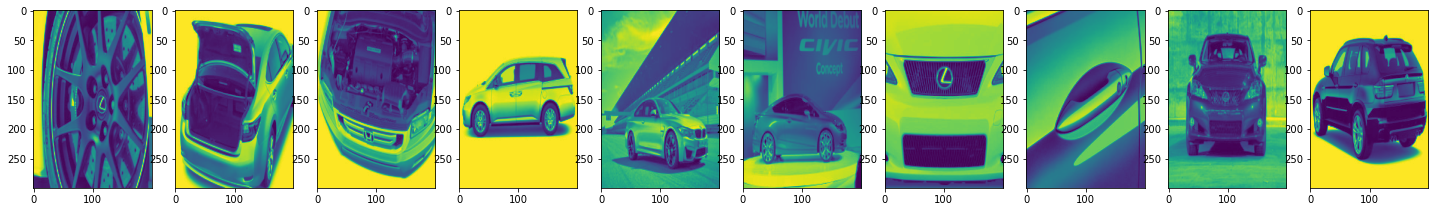

In [3]:
data = data[(data['make']=='BMW') |(data['make']=='Honda')|(data['make']=='Lexus')].reset_index(drop=True)
X= []
y= []

for i in range(len(data)):
    source = data.loc[i,'source']
    source = cv2.imread(source, cv2.IMREAD_COLOR)
    dst = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    X.append(cv2.resize(dst, dsize=(200, 300), interpolation=cv2.INTER_AREA))
    y.append(data.loc[i,'make'])
    
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X[i])

In [4]:
y[:10]

['Lexus',
 'Lexus',
 'Honda',
 'Honda',
 'BMW',
 'Honda',
 'Lexus',
 'Honda',
 'Lexus',
 'BMW']

## Feature Engineering and Data Cleaning

1. Change the list to numpy array
2. Change the type int to float
3. Change the range 0 ~ 255 to 0 ~ 1
4. Change the shape (300,200) -> (300,200,1) to make model
5. Change the y data to categorical data

In [5]:
X = np.array(X)
X = X.astype('float32')
X = X /255.0
X = X.reshape(-1,300,200,1)
y= np.array(pd.get_dummies(pd.DataFrame(y),columns=[0]))

X.shape, y.shape

((8921, 300, 200, 1), (8921, 3))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6244, 300, 200, 1), (2677, 300, 200, 1), (6244, 3), (2677, 3))

## CNN Model

In [ ]:
input_shape = X_train.shape[1:]
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = X_train.shape[1:]))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation = "softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 256, epochs = 12, shuffle=True, validation_data=(X_test,y_test),verbose = 0)


## Evaluate the Model

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Test'])


axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Test'])
plt.show()

In [ ]:
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X_test[i])

In [ ]:
pred = model.predict(X_test[:10])
pred = pd.DataFrame(pred).T.style.apply(identify_max)
pred

In [ ]:
Real = pd.DataFrame(y_test[:10]).T

Real['make'] =["BMW",'Honda','Lexus']

Real.set_index('make').style.apply(identify_max)